In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
        classification_report
        )
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load your data
df = pd.read_csv("/content/air_quality.csv")

In [12]:
print(df.head())

         pm25         no2  temperature quality_level  quality_level_encoded
0  157.744434    5.376279    31.109108          high                      0
1  101.270316  130.903661    19.298140           low                      1
2  197.204350   17.254966    37.652832          high                      0
3   81.580404   91.605322    39.682532           low                      1
4  152.419877  148.007264    12.175063           low                      1


In [13]:
print(df.dtypes)

pm25                     float64
no2                      float64
temperature              float64
quality_level             object
quality_level_encoded      int64
dtype: object


In [14]:
print(df.isnull().sum())

pm25                     0
no2                      0
temperature              0
quality_level            0
quality_level_encoded    0
dtype: int64


In [17]:
print(df.shape)

(100, 5)


In [4]:
# Encode target
le = LabelEncoder()
df['quality_level_encoded'] = le.fit_transform(df['quality_level'])

In [6]:
# Features and target
X = df[['pm25', 'no2', 'temperature']]
y = df['quality_level_encoded']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [8]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # use 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred, target_names=le.classes_)

In [9]:
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", report)

Accuracy: 0.35
Precision: 0.3333333333333333
Recall: 0.375

Classification Report:
               precision    recall  f1-score   support

        high       0.40      0.67      0.50         6
         low       0.20      0.12      0.15         8
      medium       0.40      0.33      0.36         6

    accuracy                           0.35        20
   macro avg       0.33      0.38      0.34        20
weighted avg       0.32      0.35      0.32        20



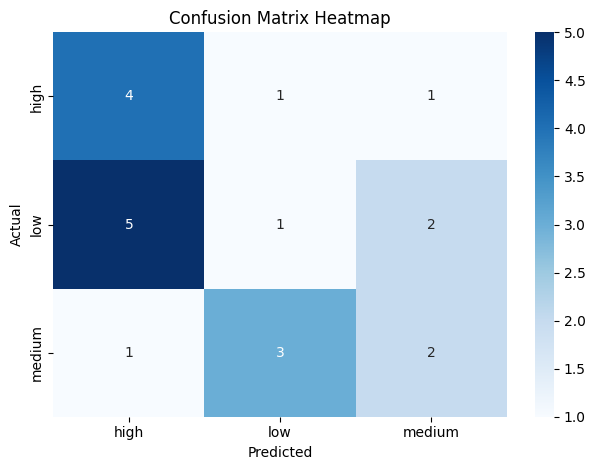

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
                        yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

Silhouette Score: 0.23133135566573884


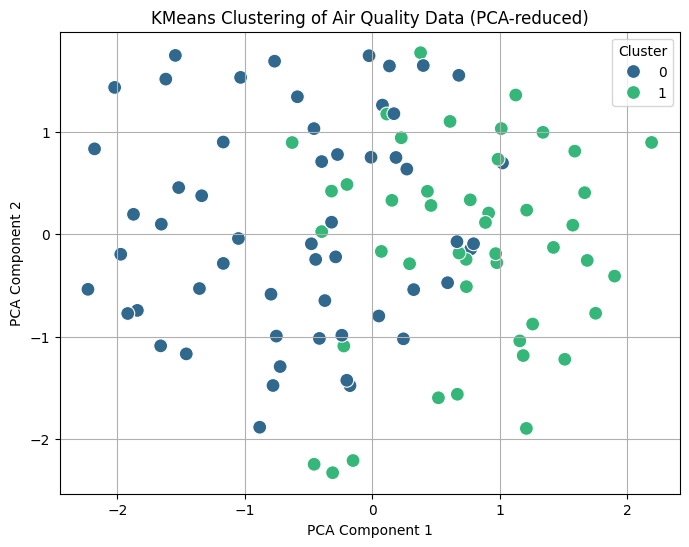

In [18]:
# Load the dataset
df = pd.read_csv("air_quality.csv")

# Select features for clustering
X = df[['pm25', 'no2', 'temperature']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

# ✅ Evaluate clustering
sil_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", sil_score)

# ✅ Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ✅ Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title('KMeans Clustering of Air Quality Data (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
